In [1]:
import os
import glob
import datetime
import statistics
import numpy as np
import pandas as pd
import import_ipynb
from marcap import marcap_data
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [2]:
#from qp import get_stocks # 1/PBR + GP/A
from ncav import get_stocks # NCAV

importing Jupyter notebook from ncav.ipynb
importing Jupyter notebook from common.ipynb


- qp + 변동성돌파: 2.173520

In [3]:
DATA_DIR = 'data/daily/8-1'

In [4]:
df_account = pd.DataFrame(columns=['start_date', 'end_date', 'filepath'])
filepaths = glob.glob(DATA_DIR + "/*.csv")
filepaths = sorted(filepaths)

days = []
for i in range(len(filepaths)):
    if i < len(filepaths) - 1: # exclude last item
        start_date =  os.path.basename(filepaths[i])[:-4]
        end_date =  os.path.basename(filepaths[i + 1])[:-4]
        
        day = {'start_date':start_date, 'end_date':end_date, 'filepath':filepaths[i]}
        days.append(day)

df_account = df_account.append(days)

In [5]:
df_account

,start_date,end_date,filepath
0,2002-08-01,2003-08-01,data/daily/8-1/2002-08-01.csv
1,2003-08-01,2004-08-02,data/daily/8-1/2003-08-01.csv
2,2004-08-02,2005-08-01,data/daily/8-1/2004-08-02.csv
3,2005-08-01,2006-08-01,data/daily/8-1/2005-08-01.csv
4,2006-08-01,2007-08-01,data/daily/8-1/2006-08-01.csv
5,2007-08-01,2008-08-01,data/daily/8-1/2007-08-01.csv
6,2008-08-01,2009-08-03,data/daily/8-1/2008-08-01.csv
7,2009-08-03,2010-08-02,data/daily/8-1/2009-08-03.csv
8,2010-08-02,2011-08-01,data/daily/8-1/2010-08-02.csv
9,2011-08-01,2012-08-01,data/daily/8-1/2011-08-01.csv


In [6]:
# 연도별 종목을 구한다.
df_account['stocks'] = df_account.apply(lambda x: get_stocks(x.filepath, x.start_date), axis=1)

------------------------------
2002-08-01 data/daily/8-1/2002-08-01.csv
30
------------------------------
2003-08-01 data/daily/8-1/2003-08-01.csv
30
------------------------------
2004-08-02 data/daily/8-1/2004-08-02.csv
30
------------------------------
2005-08-01 data/daily/8-1/2005-08-01.csv
30
------------------------------
2006-08-01 data/daily/8-1/2006-08-01.csv
30
------------------------------
2007-08-01 data/daily/8-1/2007-08-01.csv
9
------------------------------
2008-08-01 data/daily/8-1/2008-08-01.csv
30
------------------------------
2009-08-03 data/daily/8-1/2009-08-03.csv
30
------------------------------
2010-08-02 data/daily/8-1/2010-08-02.csv
30
------------------------------
2011-08-01 data/daily/8-1/2011-08-01.csv
30
------------------------------
2012-08-01 data/daily/8-1/2012-08-01.csv
30
------------------------------
2013-08-01 data/daily/8-1/2013-08-01.csv
30
------------------------------
2014-08-01 data/daily/8-1/2014-08-01.csv
29
--------------------------

In [7]:
df_account

,start_date,end_date,filepath,stocks
0,2002-08-01,2003-08-01,data/daily/8-1/2002-08-01.csv,"[002290, 003830, 011160, 002600, 004920, 02106..."
1,2003-08-01,2004-08-02,data/daily/8-1/2003-08-01.csv,"[005450, 003090, 017000, 004920, 002290, 00870..."
2,2004-08-02,2005-08-01,data/daily/8-1/2004-08-02.csv,"[005390, 000800, 002290, 005450, 004920, 02694..."
3,2005-08-01,2006-08-01,data/daily/8-1/2005-08-01.csv,"[002290, 004920, 032420, 028090, 004060, 00945..."
4,2006-08-01,2007-08-01,data/daily/8-1/2006-08-01.csv,"[034830, 005980, 031310, 065940, 033320, 02588..."
5,2007-08-01,2008-08-01,data/daily/8-1/2007-08-01.csv,"[065940, 008110, 034830, 038680, 015110, 00229..."
6,2008-08-01,2009-08-03,data/daily/8-1/2008-08-01.csv,"[005190, 017000, 086980, 004060, 045050, 03483..."
7,2009-08-03,2010-08-02,data/daily/8-1/2009-08-03.csv,"[013120, 019570, 011080, 038680, 002290, 01336..."
8,2010-08-02,2011-08-01,data/daily/8-1/2010-08-02.csv,"[013120, 057880, 011080, 008600, 013360, 03334..."
9,2011-08-01,2012-08-01,data/daily/8-1/2011-08-01.csv,"[015110, 011080, 057880, 002410, 013120, 00229..."


In [8]:
def get_daily_yield(row):
    threshold = row['Open'] + row['volatility'] * 0.5
    if row['High'] > threshold:
        return (row['Close'] / threshold) * 0.997
    else:
        return 1.0

In [9]:
def get_stock_yield_history(df_price, stock_code, start_date, end_date):
    df_price = df_price[df_price['Code'] == stock_code]
    
    if len(df_price) == 0:
        return None
    
    df_price = df_price[['Date', 'Open', 'Close', 'High', 'Low']]
    
    df_price['prev_high'] = df_price['High'].shift(1)
    df_price['prev_low'] = df_price['Low'].shift(1)
    
    df_price['volatility'] = df_price['prev_high'] - df_price['prev_low']
    df_price = df_price[1:]
    
    df_price['yield'] = df_price.apply(lambda x: get_daily_yield(x), axis=1)
    df_price['total'] = df_price['yield'].cumprod()
    
    return df_price['total']
    
    #return df_price['yield'].cumprod().tail(1).item()

In [10]:
# 연도별 수익률을 구한다.
df_account['yield'] = 0.0
df_account['yields'] = 0.0
df_account['yields'] = df_account['yields'].astype('object')

for i in range(len(filepaths)):
    if i < len(filepaths) - 1: # exclude last item
        start_date = df_account.iloc[i].start_date
        end_date = df_account.iloc[i].end_date
        
        stocks = df_account.iloc[i].stocks
        yields = []
        
        df_price = marcap_data(start_date, end_date).reset_index()
        
        stock_yield_histories = []
        # 종목별 1년 수익률 히스토리를 구한다.
        df_yield = pd.DataFrame()
        
        for stock in stocks:
            stock_yield_history = get_stock_yield_history(df_price, stock, start_date, end_date)
            stock_yield_histories.append(stock_yield_history.tolist())

        days = max(list(map(len, stock_yield_histories)))
        
        for stock_idx, stock_yield_history in enumerate(stock_yield_histories):
            if len(stock_yield_history) < days:
                stock_yield_histories[stock_idx] = stock_yield_history + [stock_yield_history[len(stock_yield_history) - 1]] * (days - len(stock_yield_history))
        
        for stock_idx, stock in enumerate(stocks):
            df_yield[stock] = stock_yield_histories[stock_idx]

        #df_yield = pd.concat(stock_yield_histories, axis=1)
        df_yield['total'] = df_yield.mean(axis=1) 
        
        # -15%가 되는 지점이 있으면 포트폴리오 운영 정지
        stop = False
        for day in range(len(df_yield)):
            if df_yield.iloc[day].total < 0.85:
                stop = True
                mean_yields = df_yield.iloc[day].total
                break
                
        print(stop)
                
        if stop == False:
            mean_yields = df_yield.iloc[len(df_yield) - 1]['total']
            #df_account.at[i, 'yields'] = yields
            
        df_account.at[i, 'yield'] = mean_yields
        
        print(start_date, '~', end_date, ":", mean_yields)

True
2002-08-01 ~ 2003-08-01 : 0.844656134565282
False
2003-08-01 ~ 2004-08-02 : 0.9006024565614605
False
2004-08-02 ~ 2005-08-01 : 0.9489793149604707
False
2005-08-01 ~ 2006-08-01 : 0.8975540448879221
False
2006-08-01 ~ 2007-08-01 : 0.9834029982320974
True
2007-08-01 ~ 2008-08-01 : 0.8401081927113676
True
2008-08-01 ~ 2009-08-03 : 0.8367799864454132
True
2009-08-03 ~ 2010-08-02 : 0.8482066147305011
True
2010-08-02 ~ 2011-08-01 : 0.8495793899597154
True
2011-08-01 ~ 2012-08-01 : 0.8474547219080062


AttributeError: 'NoneType' object has no attribute 'tolist'

In [12]:
df_account['total'] = df_account['yield'].cumprod()

In [13]:
df_account['cagr'] = 0.0
for i, row in enumerate(df_account.iterrows()):
    df_account.at[i, 'cagr'] = pow(row[1]['total'], 1/(i+1))

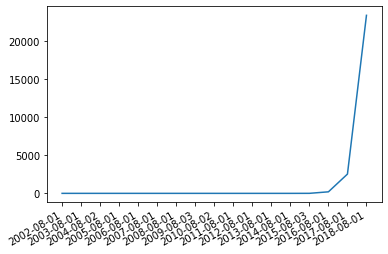

In [14]:
fig, ax = plt.subplots()
ax.plot_date(df_account['start_date'], df_account['total'], marker='', linestyle='-')
fig.autofmt_xdate()
plt.show()

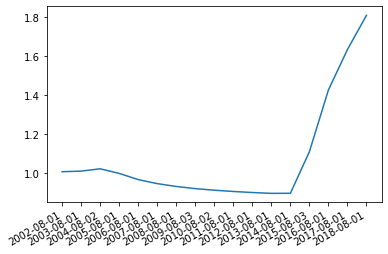

In [15]:
fig, ax = plt.subplots()
ax.plot_date(df_account['start_date'], df_account['cagr'], marker='', linestyle='-')
fig.autofmt_xdate()
plt.show()

In [16]:
df_account

,start_date,end_date,filepath,stocks,yield,yields,total,cagr
0,2002-08-01,2003-08-01,data/daily/8-1/2002-08-01.csv,"[010600, 008900, 005610, 025880, 003230, 01457...",1.006368,0,1.006368,1.006368
1,2003-08-01,2004-08-02,data/daily/8-1/2003-08-01.csv,"[010600, 009460, 003680, 014100, 025880, 00409...",1.012555,0,1.019002,1.009456
2,2004-08-02,2005-08-01,data/daily/8-1/2004-08-02.csv,"[010600, 017680, 005320, 032860, 016920, 00409...",1.045227,0,1.065088,1.021242
3,2005-08-01,2006-08-01,data/daily/8-1/2005-08-01.csv,"[010600, 017680, 007980, 046310, 005320, 01447...",0.930178,0,0.990722,0.997672
4,2006-08-01,2007-08-01,data/daily/8-1/2006-08-01.csv,"[068290, 007980, 025880, 000440, 008110, 01692...",0.848839,0,0.840963,0.965952
5,2007-08-01,2008-08-01,data/daily/8-1/2007-08-01.csv,"[017680, 006060, 010600, 045060, 079650, 02588...",0.848758,0,0.713774,0.945352
6,2008-08-01,2009-08-03,data/daily/8-1/2008-08-01.csv,"[038320, 011080, 005320, 006060, 078520, 01457...",0.847753,0,0.605104,0.930750
7,2009-08-03,2010-08-02,data/daily/8-1/2009-08-03.csv,"[011080, 017680, 010470, 079650, 007980, 08879...",0.846166,0,0.512019,0.919731
8,2010-08-02,2011-08-01,data/daily/8-1/2010-08-02.csv,"[011080, 033340, 032860, 088790, 011090, 07965...",0.848979,0,0.434693,0.911587
9,2011-08-01,2012-08-01,data/daily/8-1/2011-08-01.csv,"[011080, 038320, 033340, 044380, 091440, 01109...",0.848796,0,0.368966,0.905104


In [ ]:
#df_account.to_csv('log/' + 'ncav-' + os.path.basename(DATA_DIR) + '.csv', index=False)

In [ ]:
#df_account.iloc[-3]['yields']